<a href="https://colab.research.google.com/github/AhmadZakkiZainalAbidin/IMAGEQuality/blob/main/CLAHE_with_Python_ImageQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dasar CLAHE (Contrass Limited Adaptive Histogram Equalization)**


*   Sangat baik digunakan untuk memperbaiki citra dengan kotras yang rendah. Biasanya untuk citra under exposi pada radiologi seperti citra payudara.

*   Pada equalisasi reguler hasil citra dengan kontras yang ditinggikan dapat mengakibatkan gambar memiliki bagian yang terlalu terang ataupun terlalu gelap

*   Penggunaan CLAHE juga dapat meningkatkan performa model algoritma deteksi untuk pencitraan payudara. (E.D. Pisano, S. Zong, B.M. Hemminger, M. DeLuca, R.E. Johnston, K. Muller, M.P. Braeuning, S.M. Pizer, Contrast limited adaptive histogram equalization image processing to improve the detection of simulated spiculations in dense mammograms, J. Digit. Imaging 11 (4) (1998) 193–200 .)


Berikut Langkah dan Proses yang dilakukan dalam Penggunaan CLAHE

In [1]:
#Import dataset yang diperlukan
import cv2
from skimage import io
import matplotlib.pyplot as plt
from google.colab import files
import os

In [2]:
#Membuat Direktori Baru untuk Menyimpan File Upload
!mkdir datasetFile

File yang diupload merupakan File citra yang akan digunakan untuk perbaikan kontras(Yang dignakan sebagai praktik ini yaitu https://www.researchgate.net/profile/Torsten-Seemann/publication/239545029/figure/fig4/AS:669380883017729@1536604247030/a-low-contrast-image-b-after-enhancement.ppm ) yang bisa diunduh dan disimpan di penyimpanan lokal

In [3]:
# Tentukan tujuan Folder dari File
Folder_tujuan = '/content/datasetFile/'

# Upload File dari Penyimpanan lokal
upload = files.upload()

# Pindah File ke folder tujuan dan Hapus file sebelumya
for filename, content in upload.items():
  with open(Folder_tujuan + filename, 'wb') as f:
    f.write(content)
  os.remove(filename)

# Print Output dan letak file upload.
for filename in upload.keys():
  print(f'File yang diupload: {filename} to {Folder_tujuan + filename}')

Saving a-low-contrast-image-b-after-enhancement.ppm to a-low-contrast-image-b-after-enhancement.ppm
File yang diupload: a-low-contrast-image-b-after-enhancement.ppm to /content/datasetFile/a-low-contrast-image-b-after-enhancement.ppm


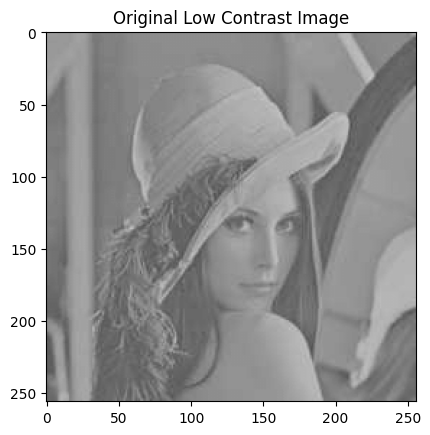

In [4]:
#Perlihatkan file yang telah diupload
image = cv2.imread("/content/datasetFile/a-low-contrast-image-b-after-enhancement.ppm", 1)
plt.imshow(image)
plt.title("Original Low Contrast Image")
plt.show()

Convert gambar ke space yang berbeda. Pada gambar asli space  Dari RGB (Warna) space ke LAB (Luminosity A and B channel). Luminosity merupakan informasi intensitas gambar.

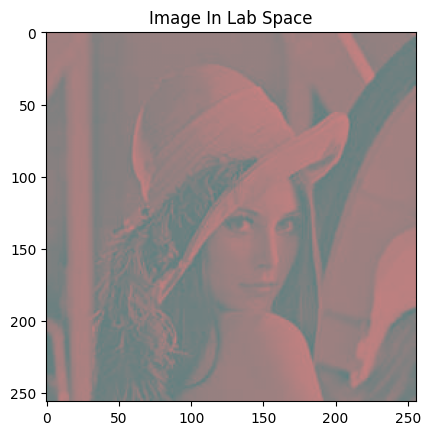

In [5]:
#Convert dan tampilkan gambar yang telah dipindah space ke LAB
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt.imshow(lab_image)
plt.title("Image In Lab Space")
plt.show()

In [6]:
#Kita bisa melihat informasi gambar tetap sama (Original dan LAB Image)
print(image.shape, image.dtype)
print(lab_image.shape, image.dtype)

(256, 256, 3) uint8
(256, 256, 3) uint8


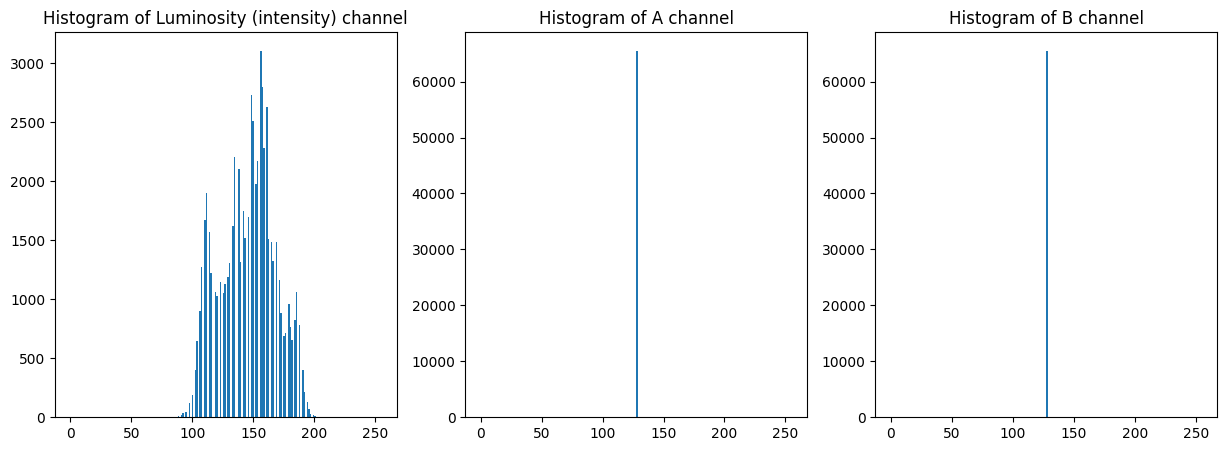

In [7]:
#Mendapatkan l a b value
l, a, b = cv2.split(lab_image)
#dictionary informasi
channels ={"Luminosity (intensity) channel" : l, "A channel":a, "B channel":b}

# membuat subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram untuk tiap channel
for i, (key, value) in enumerate(channels.items()):
    axs[i].hist(value.flat, bins=200, range=(0, 255))
    axs[i].set_title(f'Histogram of {key}')

# Show the plot
plt.show()

Dari Hasil histogram gambar grayscale diatas menggambarkan sebaran intensitas gambar pada LAB space(nilai 0 menyatakan jumlah pixel gambar yang hitam dan nilai 255 merupakan pixel gambar yang putih). Kita dapat melihat gambar bersifat under exposure sebaran nilai kontras yang tidak merata

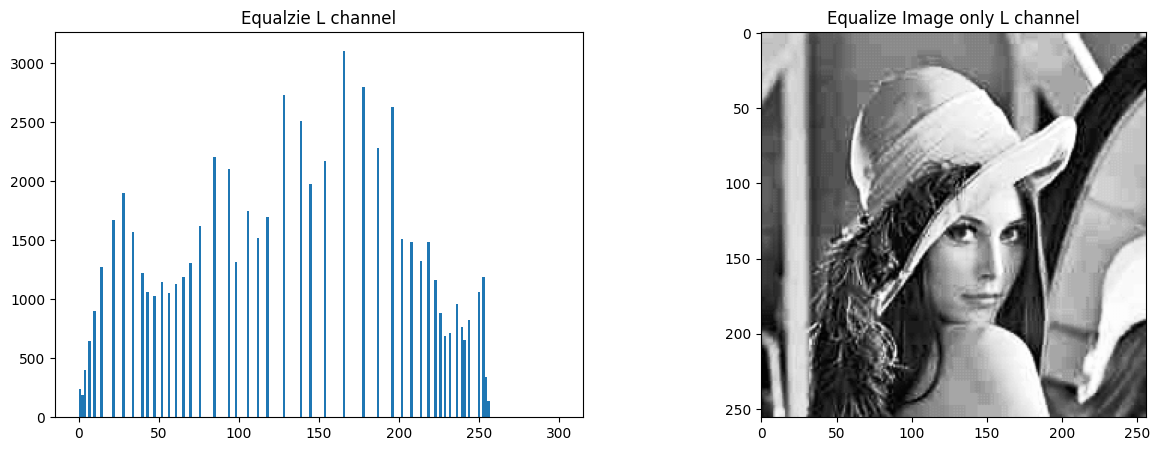

In [8]:
#Melakukan Equalisasi Normal

equalize = cv2.equalizeHist(l)

#Tampilkan hasil gambar Equalisasi untuk Channel L saja
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(equalize.flat, bins=200, range=(0,300))
axs[0].set_title("Equalzie L channel")
axs[1].imshow(equalize, cmap='gray')
axs[1].set_title("Equalize Image only L channel")
plt.show()

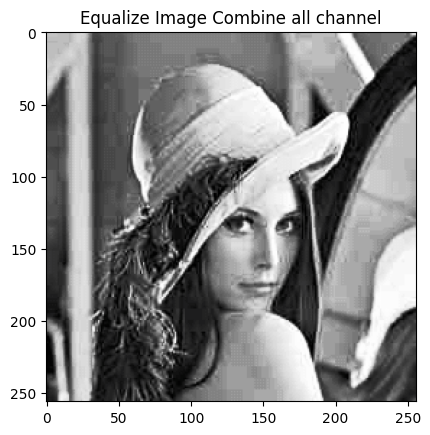

In [9]:
#Gabungkan Equalize L channel image dengan channel a dan b
update_lab_image =cv2.merge((equalize, a, b))
hist_eq_image = cv2.cvtColor(update_lab_image, cv2.COLOR_LAB2BGR)

#Hasil gambar Equalisasi yang digabung dengan channel lain
plt.imshow(hist_eq_image)
plt.title("Equalize Image Combine all channel")
plt.show()

Hasil lumayan equalization memperbaiki citra original. Namun, penggunaan ini tidak memiliki limit sehingga pada citra tertentu, hasil equalize dapat menyebabkan suatu bagian terlalu gelap dan terlalu terang. Oleh sebab itu, Limitiasi digunakan (CLAHE) untuk membatasi kontras pada nilai yang spesifik.

Contras limiting juga akan melimit amplifikasi noise pada foto yang dihasilkan.

Gunakan CLAHE
nilai tileGrideSize merupakan equalisasi tile yang digunakan (dimana pada nilai default 8x8 untuk gambar dibagi menjadi 8x8 kemudian diequalisasi dan dilimit adapdive contrasnya).CLAHE memanfaatkan interpolasi untuk memperbaiki kontras pada tiap tilenya

In [10]:
#tambahkan clahe image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(l)
#plt.hist(clahe_image.flat, bins=200, range=(0,300))

#Gabung clahe dengan channle lain (a dan b)
update_lab_image2 = cv2.merge((clahe_image,a ,b))

#convert ulang dari space LAB ke RGB
clahe_image= cv2.cvtColor(update_lab_image2, cv2.COLOR_LAB2BGR)

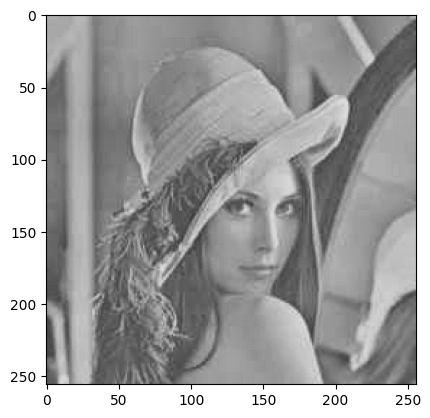

In [11]:
#Tampilkan gambar Clahe
plt.imshow(clahe_image)
plt.show()

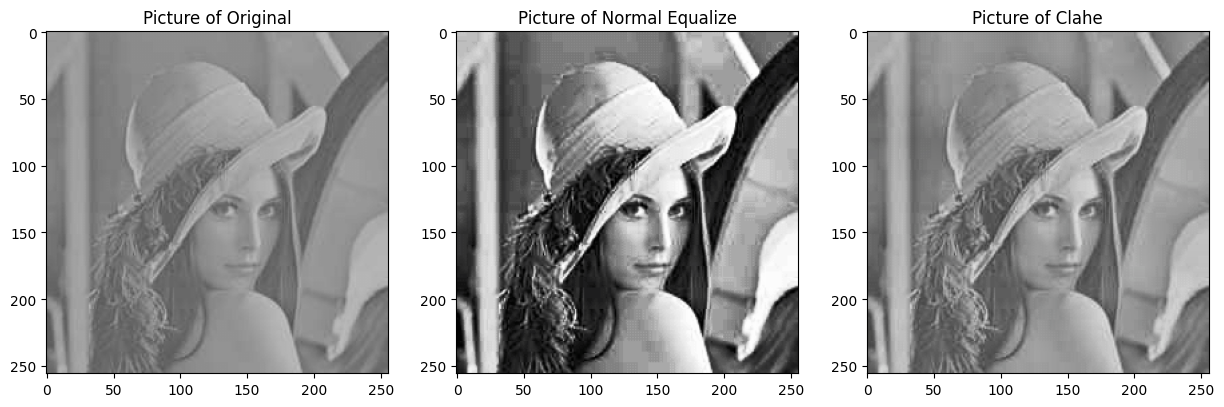

In [12]:
#Perbandingan seluruh hasil processing gambar
Final_image = { 'Original':image, 'Normal Equalize': hist_eq_image, 'Clahe': clahe_image}

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (key, value) in enumerate(Final_image.items()):
    axs[i].imshow(value, cmap='gray')
    axs[i].set_title(f'Picture of {key}')

plt.show()

# **Simplified Code (proses umum) Nanti isinya Hasil perbandingan gambar (histogram) dan hasil akhir semua gambar**

## **SatuGambar**

In [13]:
#Import dataset yang diperlukan
import cv2
from skimage import io
import matplotlib.pyplot as plt
from google.colab import files
import os

In [14]:
#Membuat Direktori Baru untuk Menyimpan File Upload
!mkdir newData

In [15]:
# Tentukan tujuan Folder dari File
Folder_tujuan = '/content/newData/'

# Upload File dari Penyimpanan lokal
upload = files.upload()

# Pindah File ke folder tujuan dan Hapus file sebelumya
for filename, content in upload.items():
  with open(Folder_tujuan + filename, 'wb') as f:
    f.write(content)
  os.remove(filename)

# Print Output dan letak file upload.
for filename in upload.keys():
  print(f'File yang diupload: {filename} to {Folder_tujuan + filename}')


Saving underExposure_X-rayImage.jpg to underExposure_X-rayImage.jpg
File yang diupload: underExposure_X-rayImage.jpg to /content/newData/underExposure_X-rayImage.jpg


Datatest https://radiologykey.com/chest-11/

In [16]:
#Baca dan convert data
image = cv2.imread("/content/newData/underExposure_X-rayImage.jpg", 1)
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

In [17]:
#Mendapatkan l a b value
l, a, b = cv2.split(lab_image)

#Melakukan Equalisasi Normal
equalize = cv2.equalizeHist(l)
#Gabungkan Equalize L channel image dengan channel a dan b
update_lab_image =cv2.merge((equalize, a, b))
hist_eq_image = cv2.cvtColor(update_lab_image, cv2.COLOR_LAB2BGR)

#Menggunakan Clahe
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(l)
#Gabung clahe dengan channle lain (a dan b)
update_lab_image2 = cv2.merge((clahe_image,a ,b))
#convert ulang dari space LAB ke RGB
clahe_image= cv2.cvtColor(update_lab_image2, cv2.COLOR_LAB2BGR)

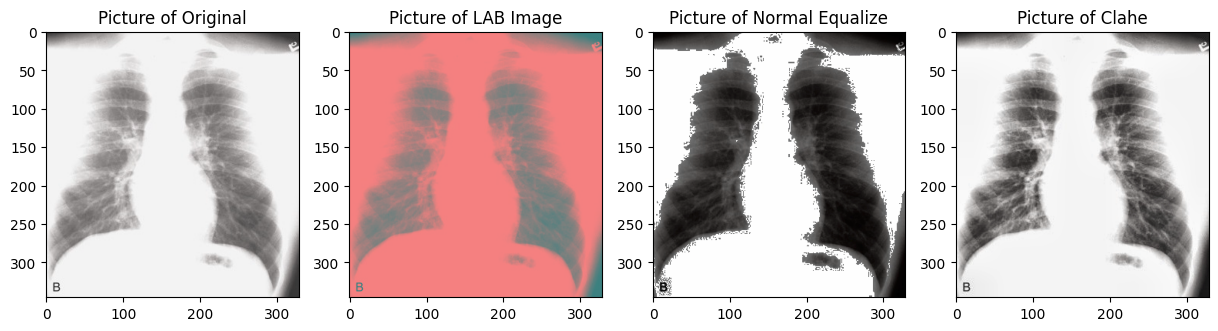

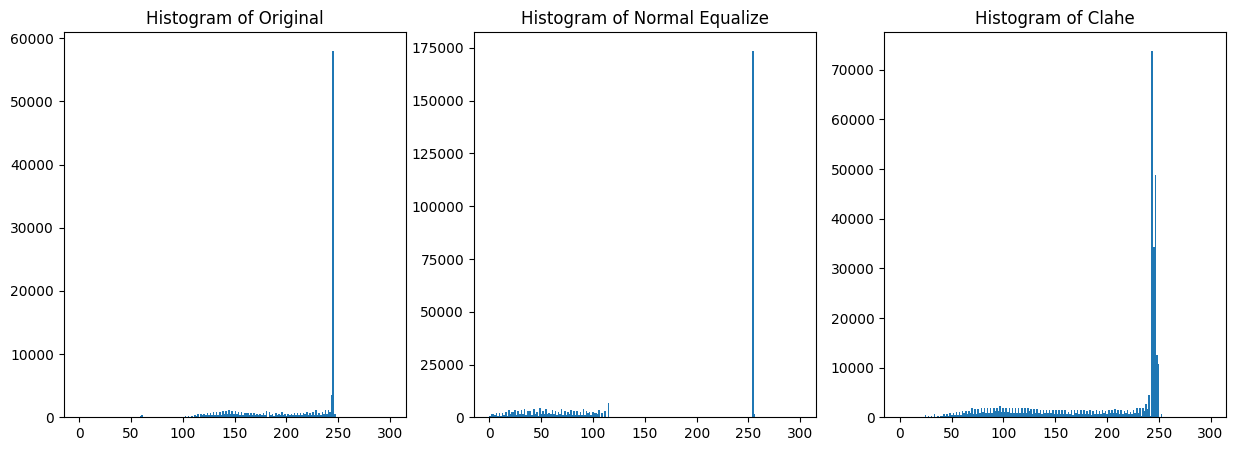

In [18]:
#Fisualisasikan Hasil Seluruh Perbaikan Gambar
Final_image = { 'Original':image,'LAB Image':lab_image, 'Normal Equalize': hist_eq_image, 'Clahe': clahe_image}

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, (key, value) in enumerate(Final_image.items()):
    axs[i].imshow(value, cmap='gray')
    axs[i].set_title(f'Picture of {key}')

#Fisualisasikan Seluruh Informasi Luminosity (FINAL)
all_L_channel_information = { 'Original':l, 'Normal Equalize': hist_eq_image, 'Clahe': clahe_image}

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (key, value) in enumerate(all_L_channel_information.items()):
    axs[i].hist(value.flat, bins=200, range=(0,300))
    axs[i].set_title(f'Histogram of {key}')

plt.show()

## **Untuk Multiple gambar (not yet done)**

Bisa menggunakan Data iterator, keras tensor flow

In [19]:
#Import dataset yang diperlukan
import cv2
from skimage import io
import matplotlib.pyplot as plt
from google.colab import files
import os

In [20]:
#Membuat Direktori Baru untuk Menyimpan File Upload
!mkdir multiData1

In [21]:
# Tentukan tujuan Folder dari File
Folder_tujuan = '/content/multiData1/'

# Upload File dari Penyimpanan lokal

file_upload = files.upload()

# Pindah File ke folder tujuan dan Hapus file sebelumya
for filename, content in file_upload.items():
  with open(Folder_tujuan + filename, 'wb') as f:
    f.write(content)
  os.remove(filename)

# Print Output dan letak file upload.
for filename in upload.keys():
  print(f'File yang diupload: {filename} to {Folder_tujuan + filename}')

File yang diupload: underExposure_X-rayImage.jpg to /content/multiData1/underExposure_X-rayImage.jpg


In [22]:
#Folder path
folder_path = "/content/multiData1/"

#Semua FIle Di list Path
files = os.listdir(folder_path)

# Lakukan Iterasi untuk Seluruh Gambar
for filename in files:
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)

    # Display the image
    plt.imshow(image)